Regresión Logística

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Cargar datos**

Cargar datos del clima de australia

In [ ]:
# Weather AUS
data = pd.read_csv('weatherAUS.csv', sep=',')
data.info()

data = data.replace('No', 0)
data = data.replace('Yes', 1)
#print(data)
#print(data.shape)
weather = np.array(data.loc[:,['MinTemp', 'MaxTemp', 'RainToday', 'RainTomorrow']])
weather = weather[~np.isnan(weather).any(axis=1)]
#print(weather)
#print(weather.shape)

data_weather = pd.DataFrame(data=weather, columns=['MinTemp', 'MaxTemp', 'RainToday', 'RainTomorrow'])
data_weather.info()
#np.savetxt("weather-new.csv", weather, delimiter=",")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Cargar datos del Titanic

In [ ]:
# Dataset Titanic
# TRAIN
train_titanic = pd.read_csv('titanic_train.csv', sep=',')
print(train_titanic)
train_titanic = train_titanic.replace('Q', 0)
train_titanic = train_titanic.replace('S', 1)
train_titanic = train_titanic.replace('C', 2)
train_titanic = train_titanic.replace('male', 0)
train_titanic = train_titanic.replace('female', 1)

train_titanic = np.array(train_titanic.loc[:,['Sex','Age','Fare','Embarked', 'Survived']])
train_titanic = train_titanic[~np.isnan(train_titanic).any(axis=1)]

print(train_titanic)
#print(test_titanic.shape)


     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
[[ 0.     22.      7.25    1.      0.    ]
 [ 1.     38.     71.2833  2.      1.    ]
 [ 1.     26.      7.925   1.      1.    ]
 ...
 [ 1.     19.     30.      1.      1.    ]
 [ 0.     26.     

In [ ]:
# Cargar datos Titanic

test_t = pd.read_csv('titanic_test.csv', sep=',')
#print(test_t)
#print(test_t.shape)

gender_sub = pd.read_csv('gender_submission.csv', sep=',')

print("TEST: \n")

test1_t = pd.merge(test_t, gender_sub,  how='left', on='PassengerId')
#print(test1_t)
#print(test1_t.shape)

test1_t = test1_t.replace('Q', 0)
test1_t = test1_t.replace('S', 1)
test1_t = test1_t.replace('C', 2)
test1_t = test1_t.replace('male', 0)
test1_t = test1_t.replace('female', 1)

test_titanic = np.array(test1_t.loc[:,['Sex','Age','Fare','Embarked', 'Survived']])
test_titanic = test_titanic[~np.isnan(test_titanic).any(axis=1)]

#print(test_titanic)
print(test_titanic.shape)


TEST: 

(331, 5)


In [ ]:
#unir datos de titanic
titanic = np.concatenate((train_titanic, test_titanic), axis=0)
data_titanic = pd.DataFrame(data=titanic, columns=['Sex','Age','Fare','Embarked', 'Survived'])
data_titanic.info()
print(data_titanic)
np.savetxt("titanic-new.csv", data_titanic, delimiter=",")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       1043 non-null   float64
 1   Age       1043 non-null   float64
 2   Fare      1043 non-null   float64
 3   Embarked  1043 non-null   float64
 4   Survived  1043 non-null   float64
dtypes: float64(5)
memory usage: 40.9 KB
      Sex   Age      Fare  Embarked  Survived
0     0.0  22.0    7.2500       1.0       0.0
1     1.0  38.0   71.2833       2.0       1.0
2     1.0  26.0    7.9250       1.0       1.0
3     1.0  35.0   53.1000       1.0       1.0
4     0.0  35.0    8.0500       1.0       0.0
...   ...   ...       ...       ...       ...
1038  1.0   3.0   13.7750       1.0       1.0
1039  1.0  37.0   90.0000       0.0       1.0
1040  1.0  28.0    7.7750       1.0       1.0
1041  1.0  39.0  108.9000       2.0       1.0
1042  0.0  38.5    7.2500       1.0       0.0

[1043 rows x 5 columns]


Normalización

In [ ]:
def Normalizar_Datos(data):
  y = data.iloc[:,-1]
  data = data.iloc[:,:-1]
  data = (data - data.mean(axis=0))/data.std(axis=0)
  data.insert(3, "y", y, True) 
  return data

Regresión Logística

$\theta^{T}x = g(\theta^{T}x)$

$g(z) = \frac{1}{1+e^{-z}}$

In [ ]:
# función sigmoidea

def Sigmoidal(X, theta):
    z=np.dot(X,theta)
    return 1/(1+np.exp(-z))


**Función de costo para la regresión logística:**

$J(\theta) = - \frac{1}{m}[\sum_{i=1}^{m}y^{(i)}\log h_\theta(x^{(i)})+(1-y^{(i)})\log(1-h_\theta(x^{(i)}))]$

In [ ]:
def Calcular_Funcion_Costo(X, y, theta):
    y_pred = Sigmoidal(X, theta)
    cross_entropy = y * np.log(y_pred) + (1-y) * np.log(1-y_pred)
    return (-1/X.shape[0]) * np.sum(cross_entropy)

**Gradiente descendiente**

$\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$

Donde : $h_{\theta}(x) = \frac{1}{1+e^{-z}}$


In [ ]:
def Calcular_Gradiente(X, y, theta):
    m = X.shape[0]
    h = Sigmoidal(X, theta) - y
    return X.T.dot(h)/m

In [ ]:
#n_features = x_Diab.shape[1]
#theta = np.zeros(n_features)
#alpha = 0.01 # learning rate
#iterations = 2000

def Gradiente_Descendiente(X,y,theta,alpha,iterations):
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        theta = theta - (alpha * Calcular_Gradiente(X,y,theta))
        #theta = theta - alpha*( X.T.dot((prediction - y)))*(1/prediction.shape[0])
        cost_history[it] = Calcular_Funcion_Costo(X,y,theta)
    return theta, cost_history

**Exactitud (Accuracy)**




In [ ]:
def Calcular_Accuracy(X, y, theta):
   prediction = Sigmoidal(X, theta).round()
   true = 0

   for i in (y-prediction):
     if i==0:
       true +=1
   return (true/np.size(y))*100

**KFolds**

In [ ]:
 def kFolds(data, k=3):
    data = data.sort_values(by=["y"]).values
    #data = data.sort_values(by=["RainTomorrow"]).values
    #data = data.sort_values("Outcome").values
    
    #Normalizar_Datos(data)

    #obtener el indice de la primera ocucrrencia de unos
    indice_break = np.where(data[:,-1])[0][0]
    #dividar los datos en dos clases
    list_class0, list_class1 = np.split(data, [indice_break])
    
    #dividir los datos en k folds
    datos_split = list()
    folds_class0 = np.array_split(list_class0, k)
    folds_class1 = np.array_split(list_class1, k)
    
    #distribuir una porcion equitativa de cada clase a cada fold
    for i in range(k):
        fold = np.concatenate((folds_class0[i],folds_class1[i]))
        
        #mezclar los dataFrames
        np.random.shuffle(fold)
        
        #separar x e y
        x_weather = fold[:, 0:-1]
        y_weather = fold[:, -1]
        
        datos_split.append([x_weather, y_weather])
    
    return datos_split

# Calcular costos y accuracy

**Calcular el historial de costos** variando la tasa, cantidad de iteraciones y los folds usados en entrenamiento y prueba

### Datos de Weather AUS

Normalizar Datos

In [ ]:
data_weather = Normalizar_Datos(data_weather)
print(data_weather)

         MinTemp   MaxTemp  RainToday    y
0       0.189992 -0.046891  -0.536383  0.0
1      -0.746917  0.262314  -0.536383  0.0
2       0.111917  0.346642  -0.536383  0.0
3      -0.465844  0.669902  -0.536383  0.0
4       0.830214  1.274257  -0.536383  0.0
...          ...       ...        ...  ...
140081 -1.355909 -0.201494  -0.536383  0.0
140082 -1.465215  0.023383  -0.536383  0.0
140083 -1.340294  0.290423  -0.536383  0.0
140084 -1.059221  0.515300  -0.536383  0.0
140085 -0.684457  0.529354  -0.536383  0.0

[140086 rows x 4 columns]


In [ ]:
folds_weather = kFolds(data_weather, 3)

#3 folds con x,y en cada uno
print('_____________________resultFolds_weather________________')
print(folds_weather[0][0].shape)
print(folds_weather[0][1])
print(folds_weather[1][0].shape)
print(folds_weather[1][1])
print(folds_weather[2][0].shape)
print(folds_weather[2][1])

_____________________resultFolds_weather________________
(46696, 3)
[1. 1. 0. ... 0. 1. 0.]
(46695, 3)
[0. 0. 0. ... 0. 0. 0.]
(46695, 3)
[0. 1. 0. ... 0. 0. 0.]


In [ ]:
tasas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]

results = {}
thetas = {}

numFolds = len(folds_titanic)
results_titanic = {}
thetas_titanic = {}
matrix_ac = np.random.rand(len(tasas),len(iteraciones),numFolds)

for t in range(len(tasas)):
    tasa = tasas[t]
    for it in range(len(iteraciones)):
        iteracion = iteraciones[it]
        for i in range(numFolds):
            #actual fold (usado para test)
            fold = folds_weather[i]
            test_fold_X = fold[0]
            test_fold_y = fold[1]

            #los otros dos folds usados para train
            fold_2 = folds_weather[(i+1)%numFolds]
            fold_3 = folds_weather[(i+2)%numFolds]
            train_fold_X = np.concatenate((fold_2[0], fold_3[0]), axis=0)
            train_fold_y = np.concatenate((fold_2[1], fold_3[1]), axis=0)
 
            n_features = train_fold_X.shape[1]
            theta = np.zeros(n_features)

            #calcular gradiente
            theta_r, cost_history_r = Gradiente_Descendiente(train_fold_X, train_fold_y, theta, tasa, iteracion)
            #calcular accuracy
            matrix_ac[t,it,i] = Calcular_Accuracy(test_fold_X, test_fold_y, theta_r)

            #guardar datos
            costo_gradiente = cost_history_r[-1]
            results["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(i)] = costo_gradiente
            thetas["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(i)] = theta_r

            #imprimir seguimiento
            print("tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(i))


tasa_0.01_iter_500_fold_0
tasa_0.01_iter_500_fold_1
tasa_0.01_iter_500_fold_2
tasa_0.01_iter_1000_fold_0
tasa_0.01_iter_1000_fold_1
tasa_0.01_iter_1000_fold_2
tasa_0.01_iter_1500_fold_0
tasa_0.01_iter_1500_fold_1
tasa_0.01_iter_1500_fold_2
tasa_0.01_iter_2000_fold_0
tasa_0.01_iter_2000_fold_1
tasa_0.01_iter_2000_fold_2
tasa_0.01_iter_2500_fold_0
tasa_0.01_iter_2500_fold_1
tasa_0.01_iter_2500_fold_2
tasa_0.01_iter_3000_fold_0
tasa_0.01_iter_3000_fold_1
tasa_0.01_iter_3000_fold_2
tasa_0.01_iter_3500_fold_0
tasa_0.01_iter_3500_fold_1
tasa_0.01_iter_3500_fold_2
tasa_0.05_iter_500_fold_0
tasa_0.05_iter_500_fold_1
tasa_0.05_iter_500_fold_2
tasa_0.05_iter_1000_fold_0
tasa_0.05_iter_1000_fold_1
tasa_0.05_iter_1000_fold_2
tasa_0.05_iter_1500_fold_0
tasa_0.05_iter_1500_fold_1
tasa_0.05_iter_1500_fold_2
tasa_0.05_iter_2000_fold_0
tasa_0.05_iter_2000_fold_1
tasa_0.05_iter_2000_fold_2
tasa_0.05_iter_2500_fold_0
tasa_0.05_iter_2500_fold_1
tasa_0.05_iter_2500_fold_2
tasa_0.05_iter_3000_fold_0
tasa_0.

Mostrar accuracis obtenidos

In [ ]:
matrix_ac = np.mean(matrix_ac,axis=2)
parametros = (0,0)
for t in range(len(tasas)):
    for it in range(len(iteraciones)):
        if(matrix_ac[t,it] > matrix_ac[parametros[0],parametros[1]]):
            parametros = (t, it)

df1 = pd.DataFrame(data = matrix_ac, index= tasas, columns = iteraciones)
print("Mayor accuracy promedio con:",tasas[parametros[0]],iteraciones[parametros[1]])
df1

NameError: ignored

**Funciones de ploteo de datos**

[0.6221702139795969, 0.6221701893045778]
[0.6404340184156021, 0.6404340100702275]
[0.6390948681208468, 0.6390948551514071]


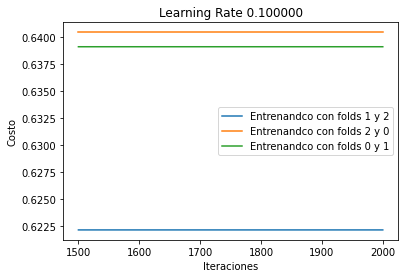

In [ ]:
for tasa in tasas:
    numFold = 0
    for fold in folds_weather:
        costo_iteraciones = []
        for iteracion in iteraciones:
            costo = results["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(numFold)]
            costo_iteraciones.append(costo)
            
        plt.plot(iteraciones, costo_iteraciones, label='Entrenandco con folds ' + str((numFold+1)%3) + ' y ' + str((numFold+2)%3) )
        numFold += 1
        print(costo_iteraciones)
    plt.title('Learning Rate %f'%tasa)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()

**Calcular Error**

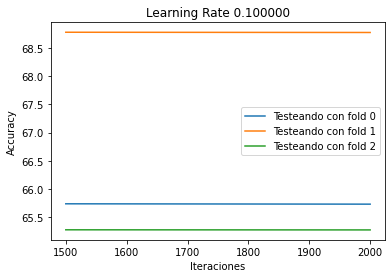

In [ ]:
numFolds = len(folds_weather)
for tasa in tasas:
    numFold = 0
    for fold in folds_weather:
        #actual fold (usado para test)
        fold = folds_weather[i]
        test_fold_X = fold[0]
        test_fold_y = fold[1]
        accuracies = []
        for iteracion in iteraciones:
            theta = thetas["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(numFold)]
            accuracy = Calcular_Accuracy(test_fold_X, test_fold_y, theta)
            accuracies.append(accuracy)
            
        plt.plot(iteraciones, accuracies, label='Testeando con fold ' + str(numFold))
        #print(accuracies)
        numFold += 1
        
    plt.title('Learning Rate %f'%tasa)
    plt.xlabel('Iteraciones')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Datos de Titanic

Normalizar Datos

In [ ]:
data_titanic = Normalizar_Datos(data_titanic)
print(data_titanic)

           Sex       Age      Fare  Embarked    y
0    -0.766130 -0.543858 -0.526477 -0.325791  0.0
1     1.304009  0.569863  0.622027  1.771739  1.0
2     1.304009 -0.265428 -0.514370 -0.325791  1.0
3     1.304009  0.361040  0.295891 -0.325791  1.0
4    -0.766130  0.361040 -0.512128 -0.325791  0.0
...        ...       ...       ...       ...  ...
1038  1.304009 -1.866402 -0.409444 -0.325791  1.0
1039  1.304009  0.500255  0.957731 -2.423321  1.0
1040  1.304009 -0.126213 -0.517061 -0.325791  1.0
1041  1.304009  0.639471  1.296722  1.771739  1.0
1042 -0.766130  0.604667 -0.526477 -0.325791  0.0

[1043 rows x 5 columns]


In [ ]:
folds_titanic = kFolds(data_titanic, 3)

#3 folds con x,y en cada uno
print('_____________________result_folds_titanic________________')
print(folds_titanic[0][0].shape)
#print(folds_titanic[0][1])
print(folds_titanic[1][0].shape)
#print(folds_titanic[1][1])
print(folds_titanic[2][0].shape)
#print(folds_titanic[2][1])

_____________________result_folds_titanic________________
(349, 4)
(347, 4)
(347, 4)


In [ ]:
tasas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iteraciones = [500, 1000, 1500, 2000, 2500, 3000, 3500]
#tasas = [0.01]
#iteraciones = [500, 1000, 1500]


numFolds = len(folds_titanic)
results_titanic = {}
thetas_titanic = {}
matrix_ac = np.random.rand(len(tasas),len(iteraciones),numFolds)

for t in range(len(tasas)):
    tasa = tasas[t]
    for it in range(len(iteraciones)):
        iteracion = iteraciones[it]
        for i in range(numFolds):
            #actual fold (usado para test)
            fold = folds_titanic[i]
            test_fold_X = fold[0]
            test_fold_y = fold[1]

            #los otros dos folds usados para train
            fold_2 = folds_titanic[(i+1)%numFolds]
            fold_3 = folds_titanic[(i+2)%numFolds]
            train_fold_X = np.concatenate((fold_2[0], fold_3[0]), axis=0)
            train_fold_y = np.concatenate((fold_2[1], fold_3[1]), axis=0)
 
            n_features = train_fold_X.shape[1]
            theta = np.zeros(n_features)

            #calcular gradiente
            theta_r, cost_history_r = Gradiente_Descendiente(train_fold_X, train_fold_y, theta, tasa, iteracion)
            #calcular accuracy
            matrix_ac[t,it,i] = Calcular_Accuracy(test_fold_X, test_fold_y, theta_r)

            #guardar datos
            costo_gradiente = cost_history_r[-1]
            results_titanic["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(i)] = costo_gradiente
            thetas_titanic["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(i)] = theta_r

            #imprimir seguimiento
            print("tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(i))


tasa_0.01_iter_500_fold_0
tasa_0.01_iter_500_fold_1
tasa_0.01_iter_500_fold_2
tasa_0.01_iter_1000_fold_0
tasa_0.01_iter_1000_fold_1
tasa_0.01_iter_1000_fold_2
tasa_0.01_iter_1500_fold_0
tasa_0.01_iter_1500_fold_1
tasa_0.01_iter_1500_fold_2
tasa_0.01_iter_2000_fold_0
tasa_0.01_iter_2000_fold_1
tasa_0.01_iter_2000_fold_2
tasa_0.01_iter_2500_fold_0
tasa_0.01_iter_2500_fold_1
tasa_0.01_iter_2500_fold_2
tasa_0.01_iter_3000_fold_0
tasa_0.01_iter_3000_fold_1
tasa_0.01_iter_3000_fold_2
tasa_0.01_iter_3500_fold_0
tasa_0.01_iter_3500_fold_1
tasa_0.01_iter_3500_fold_2
tasa_0.05_iter_500_fold_0
tasa_0.05_iter_500_fold_1
tasa_0.05_iter_500_fold_2
tasa_0.05_iter_1000_fold_0
tasa_0.05_iter_1000_fold_1
tasa_0.05_iter_1000_fold_2
tasa_0.05_iter_1500_fold_0
tasa_0.05_iter_1500_fold_1
tasa_0.05_iter_1500_fold_2
tasa_0.05_iter_2000_fold_0
tasa_0.05_iter_2000_fold_1
tasa_0.05_iter_2000_fold_2
tasa_0.05_iter_2500_fold_0
tasa_0.05_iter_2500_fold_1
tasa_0.05_iter_2500_fold_2
tasa_0.05_iter_3000_fold_0
tasa_0.

Mostrar accuracis obtenidos

In [ ]:
#matrix_ac = np.mean(matrix_ac,axis=2)
parametros = (0,0)
for t in range(len(tasas)):
    for it in range(len(iteraciones)):
        if(matrix_ac[t,it] > matrix_ac[parametros[0],parametros[1]]):
            parametros = (t, it)

df1 = pd.DataFrame(data = matrix_ac, index= tasas, columns = iteraciones)
print("Mayor accuracy promedio con:",tasas[parametros[0]],iteraciones[parametros[1]])
df1

Mayor accuracy promedio con: 0.01 1000


,500,1000,1500,2000,2500,3000,3500
0.01,83.89305,83.989111,83.989111,83.989111,83.89305,83.796988,83.89305
0.05,83.89305,83.893050,83.893050,83.893050,83.89305,83.893050,83.89305
0.10,83.89305,83.893050,83.893050,83.893050,83.89305,83.893050,83.89305
0.20,83.89305,83.893050,83.893050,83.893050,83.89305,83.893050,83.89305
0.30,83.89305,83.893050,83.893050,83.893050,83.89305,83.893050,83.89305
0.40,83.89305,83.893050,83.893050,83.893050,83.89305,83.893050,83.89305


Sabiendo que el mayor accuracy promedio es con una tasa de 0.01 y 1000 iteraciones, plotearemos el historial de costos con esos hiperparametros definidos

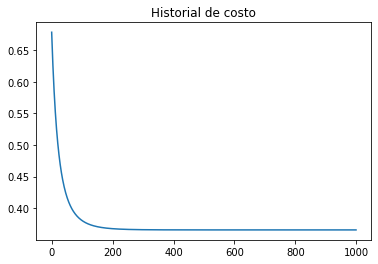

In [ ]:
tasa = 0.1
iteracion = 1000

n_features = train_fold_X.shape[1]
theta = np.zeros(n_features)
theta_r, cost_history_r = Gradiente_Descendiente(train_fold_X, train_fold_y, theta, tasa, iteracion)
plt.plot(cost_history_r)
plt.title('Historial de costo')
plt.show()

**Funciones de ploteo de datos**

[0.4558076411313702, 0.42375804769873654, 0.4163665054520998, 0.41426150772970355, 0.4135980131201399, 0.4133771096751379, 0.41330119079821365]
[0.503981853565396, 0.4826602076945154, 0.47845323686426816, 0.4773803554669682, 0.47705283796370995, 0.4769346442184388, 0.4768845179575045]
[0.42028489689304616, 0.3811707101421262, 0.37112259710766937, 0.3678560746544598, 0.36665756667956856, 0.3661850616128484, 0.3659897793600004]


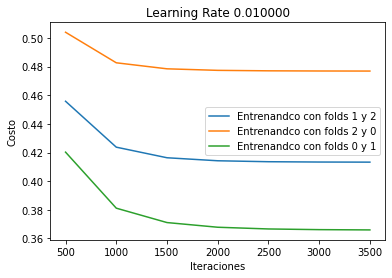

[0.41359262820971204, 0.4132617155210714, 0.41325986174487805, 0.4132598493087046, 0.4132598492040533, 0.4132598492028157, 0.41325984920279607]
[0.47705013638569105, 0.47683970191209374, 0.4768299193297097, 0.4768291428732742, 0.4768290795107457, 0.47682907431975136, 0.47682907389404106]
[0.3666477814171311, 0.3658530265653475, 0.365839352771222, 0.36583895807430034, 0.36583894030429065, 0.36583893926957944, 0.36583893920332267]


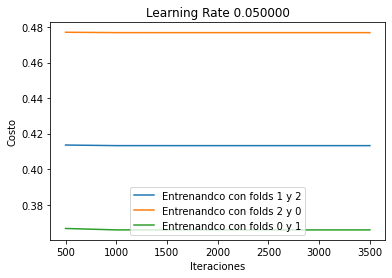

[0.4132616555440371, 0.413259849303306, 0.4132598492028146, 0.4132598492027957, 0.4132598492027956, 0.4132598492027957, 0.4132598492027957]
[0.4768395828486506, 0.4768291417130219, 0.4768290743091112, 0.476829073859028, 0.47682907385601786, 0.4768290738559977, 0.4768290738559976]
[0.36585275348601143, 0.3658389577161296, 0.3658389392679632, 0.3658389391989492, 0.3658389391986493, 0.36583893919864796, 0.36583893919864796]


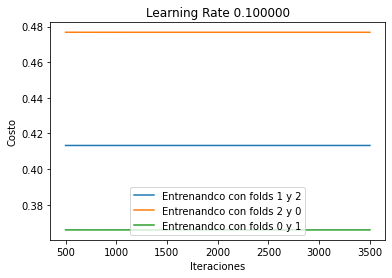

[0.41325984929322274, 0.4132598492027956, 0.4132598492027957, 0.4132598492027956, 0.4132598492027956, 0.4132598492027956, 0.4132598492027956]
[0.47682913943178235, 0.4768290738588533, 0.4768290738559977, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976]
[0.3658389570214732, 0.36583893919893157, 0.36583893919864796, 0.36583893919864796, 0.36583893919864796, 0.36583893919864796, 0.36583893919864796]


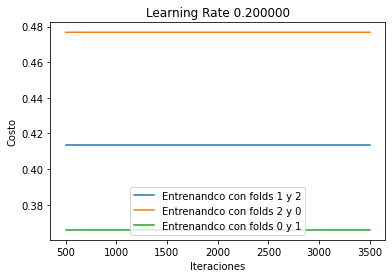

[0.41325984920281034, 0.41325984920279574, 0.4132598492027957, 0.4132598492027957, 0.4132598492027957, 0.4132598492027957, 0.4132598492027957]
[0.47682907426844756, 0.47682907385599776, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976]
[0.3658389392618393, 0.36583893919864796, 0.365838939198648, 0.36583893919864796, 0.36583893919864796, 0.36583893919864796, 0.36583893919864796]


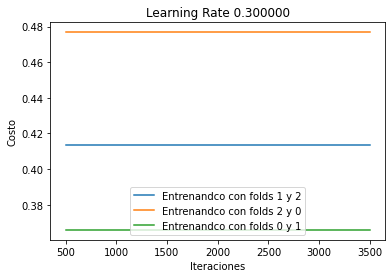

[0.4132598492027956, 0.4132598492027956, 0.4132598492027956, 0.4132598492027956, 0.4132598492027956, 0.4132598492027956, 0.4132598492027956]
[0.47682907385852924, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976, 0.4768290738559976]
[0.36583893919889926, 0.36583893919864796, 0.365838939198648, 0.365838939198648, 0.365838939198648, 0.365838939198648, 0.365838939198648]


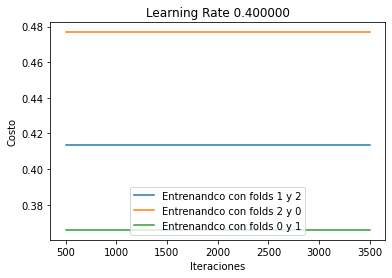

In [ ]:
for tasa in tasas:
    numFold = 0
    for fold in folds_titanic:
        costo_iteraciones = []
        for iteracion in iteraciones:
            costo = results_titanic["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(numFold)]
            costo_iteraciones.append(costo)
            
        plt.plot(iteraciones, costo_iteraciones, label='Entrenandco con folds ' + str((numFold+1)%3) + ' y ' + str((numFold+2)%3) )
        numFold += 1
        print(costo_iteraciones)
    plt.title('Learning Rate %f'%tasa)
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()

**Plotear Error**

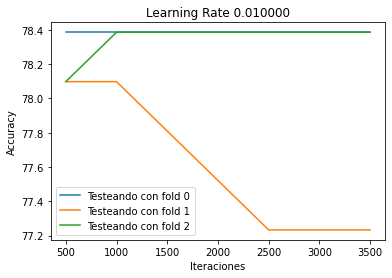

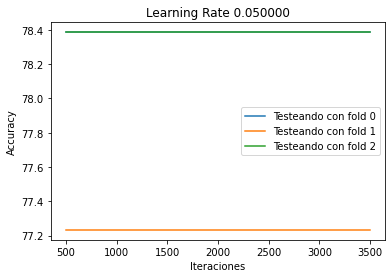

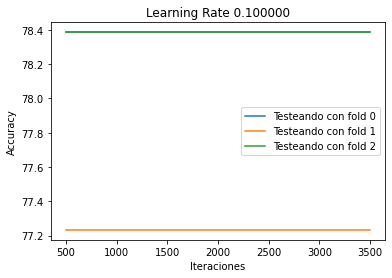

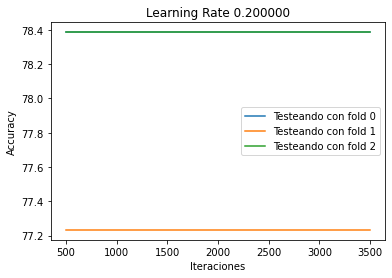

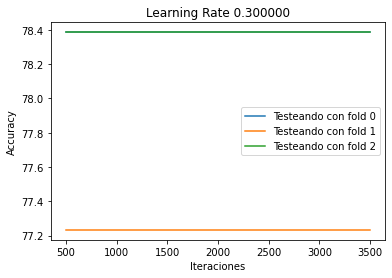

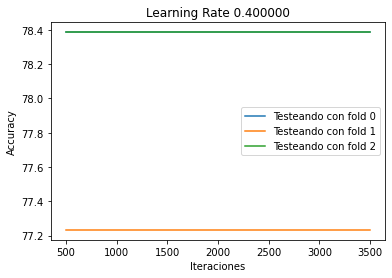

In [ ]:
numFolds = len(folds_titanic)
for tasa in tasas:
    numFold = 0
    for fold in folds_titanic:
        #actual fold (usado para test)
        fold = folds_titanic[i]
        test_fold_X = fold[0]
        test_fold_y = fold[1]
        accuracies = []
        for iteracion in iteraciones:
            theta = thetas_titanic["tasa_"+str(tasa)+"_iter_"+str(iteracion)+"_fold_"+str(numFold)]
            accuracy = Calcular_Accuracy(test_fold_X, test_fold_y, theta)
            accuracies.append(accuracy)
            
        plt.plot(iteraciones, accuracies, label='Testeando con fold ' + str(numFold))
        #print(accuracies)
        numFold += 1
        
    plt.title('Learning Rate %f'%tasa)
    plt.xlabel('Iteraciones')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()